In [1]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [2]:
from birdclef.utils import get_spark
from birdclef.knn_labels import (
    get_knn_labels,
    get_label_agreement,
    get_subset_pdf,
    plot_distances,
    compute_embedding_2d,
    plot_embedding,
    write_plots_to_disk,
)

spark = get_spark(memory="16g")

df = spark.read.parquet(
    "../data/processed/birdclef-2022/birdnet-embeddings-with-neighbors/v1"
)

labeled_neighborhood = get_knn_labels(df).cache()
agreement = get_label_agreement(labeled_neighborhood)

agreement.show(vertical=True, n=3)

/home/acmiy/birdclef-2023/venv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/23 03:32:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


-RECORD 0--------------------------------------------
 ego_primary_label             | normoc              
 n                             | 25068               
 n_ego_birdnet_label_matches   | 5742                
 n_knn_birdnet_label_matches   | 13414               
 pct_ego_birdnet_label_matches | 0.22905696505505027 
 pct_knn_birdnet_label_matches | 0.535104515717249   
-RECORD 1--------------------------------------------
 ego_primary_label             | houspa              
 n                             | 18173               
 n_ego_birdnet_label_matches   | 8683                
 n_knn_birdnet_label_matches   | 15517               
 pct_ego_birdnet_label_matches | 0.47779673141473616 
 pct_knn_birdnet_label_matches | 0.8538491168216585  
-RECORD 2--------------------------------------------
 ego_primary_label             | skylar              
 n                             | 12849               
 n_ego_birdnet_label_matches   | 6816                
 n_knn_birdnet_label_matches

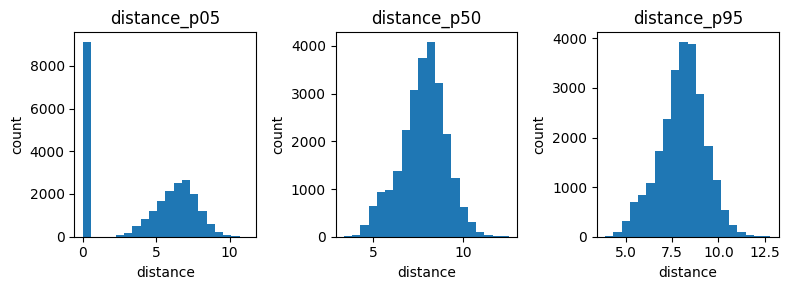

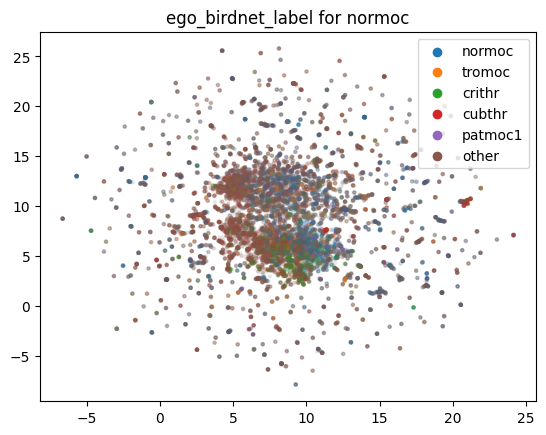

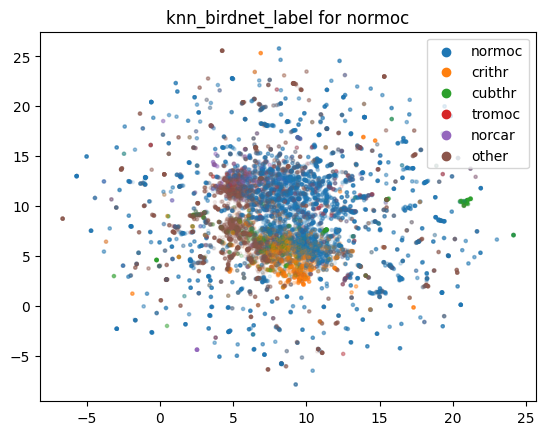

In [3]:
import matplotlib.pyplot as plt

pdf = get_subset_pdf(df, labeled_neighborhood, 0)
plot_distances(pdf)
plt.show()
emb = compute_embedding_2d(pdf)
plot_embedding(pdf, emb, "ego_birdnet_label", 5)
plt.show()
plot_embedding(pdf, emb, "knn_birdnet_label", 5)

In [5]:
# lets write this to disk
import tqdm

path_prefix = (
    "../data/processed/birdclef-2022/birdnet-embeddings-with-neighbors-static/v1"
)

# only compute the top 20 plots
n = 20
for i in tqdm.tqdm(range(n)):
    write_plots_to_disk(df, labeled_neighborhood, i, path_prefix)

100%|██████████| 20/20 [04:18<00:00, 12.95s/it]                                 


In [7]:
from pathlib import Path

path_prefix = "../data/processed/birdclef-2022/birdnet-embeddings-with-neighbors-agreement-static/v1"
Path(path_prefix).mkdir(parents=True, exist_ok=True)
agreement.toPandas().to_json(path_prefix + "/agreement.json", orient="records")